# Neural networks and deep learning


## Analysis of a regression problem with Deep Learning


### Guillermo Altesor
---


In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# Anaconda fixing problem
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

## California Housing Dataset
 This time we are going to use a data set that contains information on the price of houses found in a district of California. The columns are the following:

- _longitude_: how far west is a house; a higher value is further west.
- _latitude_: how far north is a house; a higher value is further north.
- _housing_median_age_: average age of a house; a low value is a newer home.
- _total_rooms_: total number of rooms.
- _total_bedrooms_: total number of bedrooms.
- _population_: total number of people residing.
- _households_: total number of households, a group of people residing within a housing unit.
- _median_income_: median household income within a block of houses (measured in tens of thousands of dollars).
- _ocean_proximity_: location of the house near the ocean or sea.
- _median_house_value (**variables to predict**)_: median house value (measured in dollars).

Let's load the data from the `housing.csv` file:

In [ ]:
df = pd.read_csv('housing.csv')

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,3,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,3,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,3,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,3,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,3,342200.0


In [ ]:
df.shape

(20433, 10)

We are going to separate the target variable from the rest of the variables (we access the value field so that the data is of type _numpy array_ and can be used as an input variable for our network):

In [ ]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [ ]:
x = df[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity']].values
y = df[['median_house_value']].values

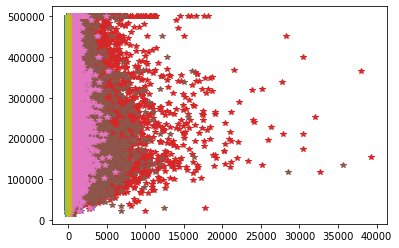

In [ ]:
plt.plot(x,y,'*')

## 1. Establish a suitable cost function for our problem.

In this case, as it is a regression problem and the values of our data are so large, we choose the cost function `mean_absolute_percentage_error`, this error varies between the values 100 and 0 where 100 is the worst error that we can have and 0 is the best error, so in our training we will look for an error closer to 0.

In [ ]:
actual_loss = 'mean_absolute_percentage_error'

## 2. Overfitting on a small data set.

Now, as we have seen in class, we are going to find a network structure that fits the data that we are going to use. We are going to create several networks to see how they work.

To do quick training and see if the network adapts to the data, we are going to use only a subset of the data, that is, we will use 1000 data and we will not use a validation set.

# First Network
- **Network settings**:
     - Network architecture:
         - *1st Layer*: input layer where you indicate the dimension of the data.
         - *2nd Layer*: dense layer with 8 neurons and *relu* activation function.
         - *3rd Layer*: dense layer with 8 neurons and *relu* activation function.
         - *4th Layer*: output layer with a neuron without activation function.
        
     - Training Type:
         - *Epochs*: 30
         - *Optimizer*: *adam*
         - *Learning Rate*: 0.001

In [ ]:
# define the network
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((9,)),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(1)
])

# define optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

# compile the model
model.compile(loss=actual_loss, optimizer=opt)

In [ ]:
hist = model.fit(x[:1000], y[:1000], epochs=30)


Epoch 1/30
32/32 [==============================] - 1s 2ms/step - loss: 99.7110
Epoch 2/30
32/32 [==============================] - 0s 2ms/step - loss: 99.4347
Epoch 3/30
32/32 [==============================] - 0s 2ms/step - loss: 99.1295
Epoch 4/30
32/32 [==============================] - 0s 2ms/step - loss: 98.7555
Epoch 5/30
32/32 [==============================] - 0s 2ms/step - loss: 98.2481
Epoch 6/30
32/32 [==============================] - 0s 1ms/step - loss: 97.5567
Epoch 7/30
32/32 [==============================] - 0s 2ms/step - loss: 96.6385
Epoch 8/30
32/32 [==============================] - 0s 2ms/step - loss: 95.3243
Epoch 9/30
32/32 [==============================] - 0s 2ms/step - loss: 93.4601
Epoch 10/30
32/32 [==============================] - 0s 2ms/step - loss: 91.0622
Epoch 11/30
32/32 [==============================] - 0s 1ms/step - loss: 88.0859
Epoch 12/30
32/32 [==============================] - 0s 1ms/step - loss: 84.4413
Epoch 13/30
32/32 [==================

### Second Network
We are going to enhance the network architecture a little more:

- **Network settings**:
     - Network architecture:
         - *1st Layer*: input layer where you indicate the dimension of the data.
         - *2nd Layer*: dense layer with 64 neurons and *relu* activation function.
         - *3rd Layer*: dense layer with 32 neurons and *relu* activation function.
         - *4th Layer*: dense layer with 32 neurons and *relu* activation function.
         - *5th Layer*: output layer with a neuron without activation function.
        
     - Training Type:
         - *Epochs*: 30
         - *Optimizer*: *adam*
         - *Learning Rate*: 0.001

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((9,)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1)
])

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss=actual_loss, optimizer=opt)

In [ ]:
hist = model.fit(x[:1000], y[:1000], epochs=30)

Epoch 1/30
32/32 [==============================] - 1s 2ms/step - loss: 99.5691
Epoch 2/30
32/32 [==============================] - 0s 2ms/step - loss: 97.4121
Epoch 3/30
32/32 [==============================] - 0s 2ms/step - loss: 90.4576
Epoch 4/30
32/32 [==============================] - 0s 3ms/step - loss: 71.5438
Epoch 5/30
32/32 [==============================] - 0s 2ms/step - loss: 48.4523
Epoch 6/30
32/32 [==============================] - 0s 2ms/step - loss: 45.1671
Epoch 7/30
32/32 [==============================] - 0s 2ms/step - loss: 44.9473
Epoch 8/30
32/32 [==============================] - 0s 2ms/step - loss: 44.5923
Epoch 9/30
32/32 [==============================] - 0s 2ms/step - loss: 44.4938
Epoch 10/30
32/32 [==============================] - 0s 2ms/step - loss: 44.0797
Epoch 11/30
32/32 [==============================] - 0s 2ms/step - loss: 43.7325
Epoch 12/30
32/32 [==============================] - 0s 2ms/step - loss: 43.2476
Epoch 13/30
32/32 [==================

### Third Network

- **Network settings**:
     - Network architecture:
         - *1st Layer*: input layer where you indicate the dimension of the data.
         - *2nd Layer*: dense layer with 128 neurons and *relu* activation function.
         - *3rd Layer*: dense layer with 64 neurons and *relu* activation function.
         - *4th Layer*: dense layer with 32 neurons and *relu* activation function.
         - *5th Layer*: dense layer with 16 neurons and *relu* activation function.
         - *6th Layer*: output layer with a neuron without activation function.
        
     - Training Type:
         - *Epochs*: 30
         - *Optimizer*: *adam*
         - *Learning Rate*: 0.001

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((9,)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1)
])

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss=actual_loss, optimizer=opt)

In [ ]:
hist = model.fit(x[:1000], y[:1000], epochs=30)

Epoch 1/30
32/32 [==============================] - 1s 2ms/step - loss: 99.6881
Epoch 2/30
32/32 [==============================] - 0s 2ms/step - loss: 96.7529
Epoch 3/30
32/32 [==============================] - 0s 2ms/step - loss: 74.2582
Epoch 4/30
32/32 [==============================] - 0s 2ms/step - loss: 45.3765
Epoch 5/30
32/32 [==============================] - 0s 2ms/step - loss: 44.5506
Epoch 6/30
32/32 [==============================] - 0s 2ms/step - loss: 44.1299
Epoch 7/30
32/32 [==============================] - 0s 2ms/step - loss: 43.4517
Epoch 8/30
32/32 [==============================] - 0s 2ms/step - loss: 42.8765
Epoch 9/30
32/32 [==============================] - 0s 2ms/step - loss: 41.8711
Epoch 10/30
32/32 [==============================] - 0s 2ms/step - loss: 40.9058
Epoch 11/30
32/32 [==============================] - 0s 2ms/step - loss: 39.7377
Epoch 12/30
32/32 [==============================] - 0s 2ms/step - loss: 38.1522
Epoch 13/30
32/32 [==================

### Fourth Neural Network

Let's make one last network with more layers and neurons:

- **Network settings**:
    - Network architecture:
        - *1st Layer*: input layer where you indicate the dimension of the data.
        - *2nd Layer*: dense layer with 1024 neurons and *relu* activation function.
        - *3rd Layer*: dense layer with 512 neurons and *relu* activation function.
        - *4th Layer*: dense layer with 256 neurons and *relu* activation function.
        - *5th Layer*: dense layer with 128 neurons and *relu* activation function.
        - *6th Layer*: dense layer with 64 neurons and *relu* activation function.
        - *7th Layer*: dense layer with 32 neurons and *relu* activation function.
        - *8th Layer*: dense layer with 16 neurons and *relu* activation function.
        - *9th Layer*: output layer with a neuron without activation function.
        
    - Training Type:
        - *Epochs*: 30
        - *Optimizer*: *adam*
        - *Learning Rate*: 0.001

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((9,)),
    tf.keras.layers.Dense(1024, activation="relu"),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1)
])

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss=actual_loss, optimizer=opt)

In [ ]:
hist = model.fit(x[:1000], y[:1000], epochs=30)

Epoch 1/30
32/32 [==============================] - 1s 13ms/step - loss: 89.8070
Epoch 2/30
32/32 [==============================] - 0s 12ms/step - loss: 46.1069
Epoch 3/30
32/32 [==============================] - 0s 13ms/step - loss: 42.8676
Epoch 4/30
32/32 [==============================] - 0s 13ms/step - loss: 40.5491
Epoch 5/30
32/32 [==============================] - 0s 12ms/step - loss: 34.6169
Epoch 6/30
32/32 [==============================] - 0s 12ms/step - loss: 29.5426
Epoch 7/30
32/32 [==============================] - 0s 12ms/step - loss: 30.2468
Epoch 8/30
32/32 [==============================] - 0s 12ms/step - loss: 27.7114
Epoch 9/30
32/32 [==============================] - 0s 13ms/step - loss: 26.6669
Epoch 10/30
32/32 [==============================] - 0s 13ms/step - loss: 26.2317
Epoch 11/30
32/32 [==============================] - 0s 13ms/step - loss: 25.9091
Epoch 12/30
32/32 [==============================] - 0s 13ms/step - loss: 26.0584
Epoch 13/30
32/32 [======

In [ ]:
print('We are left with the configuration of 9 layers')
print('It seems that the network responds better the more layers and neurons it has')

: 

## 3. We choose an Optimizer.

We have established Adam in previous trainings. Let's check it out for the validation set how it works and then we'll try using an SGD optimizer.

We will train the model with the following configuration

- A `validation_split` of 0.2
- Using all the data and not just 1000.
- Using 5 epochs in total.

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((9,)),
    tf.keras.layers.Dense(1024, activation="relu"),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1)
])

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss=actual_loss, optimizer=opt)

In [ ]:
hist = model.fit(x, y, validation_split=0.2, epochs=5)

Epoch 1/5
511/511 [==============================] - 8s 14ms/step - loss: 47.3042 - val_loss: 46.5973
Epoch 2/5
511/511 [==============================] - 7s 13ms/step - loss: 40.6727 - val_loss: 42.9477
Epoch 3/5
511/511 [==============================] - 7s 14ms/step - loss: 37.0929 - val_loss: 49.8779
Epoch 4/5
511/511 [==============================] - 7s 13ms/step - loss: 35.0046 - val_loss: 36.4283
Epoch 5/5
511/511 [==============================] - 8s 16ms/step - loss: 32.8848 - val_loss: 36.2065


### Changing the optimazer to a SGD


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((9,)),
    tf.keras.layers.Dense(1024, activation="relu"),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1)
])
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 1024)              10240     
                                                                 
 dense_29 (Dense)            (None, 512)               524800    
                                                                 
 dense_30 (Dense)            (None, 256)               131328    
                                                                 
 dense_31 (Dense)            (None, 128)               32896     
                                                                 
 dense_32 (Dense)            (None, 64)                8256      
                                                                 
 dense_33 (Dense)            (None, 32)                2080      
                                                                 
 dense_34 (Dense)            (None, 16)               

In [ ]:
opt = tf.keras.optimizers.SGD(learning_rate=0.001)

model.compile(loss=actual_loss, optimizer=opt)

In [ ]:
hist = model.fit(x, y, validation_split=0.2, epochs=5)

Epoch 1/5
511/511 [==============================] - 7s 13ms/step - loss: 92.9805 - val_loss: 59.0772
Epoch 2/5
511/511 [==============================] - 7s 13ms/step - loss: 56.6664 - val_loss: 56.6934
Epoch 3/5
511/511 [==============================] - 6s 12ms/step - loss: 55.9132 - val_loss: 55.6487
Epoch 4/5
511/511 [==============================] - 6s 12ms/step - loss: 53.3730 - val_loss: 51.2533
Epoch 5/5
511/511 [==============================] - 7s 13ms/step - loss: 50.2122 - val_loss: 52.4166


In [ ]:
print('Definitely Adam is the best optimizer, the error is noticeably lower')

Definitivamente Adam, el error es notablemente más bajo


## 4. Let's try different configurations with a small number of epochs.

We are going to perform different experiments by changing the learning rate of our optimizer.

Training with the architecture and optimizer that have worked best and a **learning rate of 0.1**.

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((9,)),
    tf.keras.layers.Dense(1024, activation="relu"),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1)
])

opt = tf.keras.optimizers.Adam(learning_rate=0.1)

model.compile(loss=actual_loss, optimizer=opt)

In [ ]:
hist = model.fit(x, y, validation_split=0.2, epochs=5)

Epoch 1/5
511/511 [==============================] - 8s 13ms/step - loss: 116.0946 - val_loss: 54.7737
Epoch 2/5
511/511 [==============================] - 7s 13ms/step - loss: 45.4055 - val_loss: 59.1847
Epoch 3/5
511/511 [==============================] - 7s 13ms/step - loss: 40.7617 - val_loss: 55.8016
Epoch 4/5
511/511 [==============================] - 7s 14ms/step - loss: 38.5997 - val_loss: 39.6968
Epoch 5/5
511/511 [==============================] - 7s 14ms/step - loss: 36.8084 - val_loss: 36.4168


### <font color="#004D7F" size=4>Ejercicio 10</font>

Realiza el mismo entrenamiento que el ejercicio anterior pero esta vez usa un **learning rate de 0.0001**.

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((9,)),
    tf.keras.layers.Dense(1024, activation="relu"),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1)
])

opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss=actual_loss, optimizer=opt)

In [ ]:
hist = model.fit(x, y, validation_split=0.2, epochs=5)

Epoch 1/5
511/511 [==============================] - 7s 13ms/step - loss: 63.2414 - val_loss: 54.2561
Epoch 2/5
511/511 [==============================] - 7s 14ms/step - loss: 48.2393 - val_loss: 48.2463
Epoch 3/5
511/511 [==============================] - 7s 14ms/step - loss: 42.4844 - val_loss: 48.0403
Epoch 4/5
511/511 [==============================] - 7s 14ms/step - loss: 41.8371 - val_loss: 47.3985
Epoch 5/5
511/511 [==============================] - 7s 13ms/step - loss: 41.0537 - val_loss: 46.8292


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((9,)),
    tf.keras.layers.Dense(1024, activation="relu"),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1)
])

opt = tf.keras.optimizers.Adam(learning_rate=0.01)

model.compile(loss=actual_loss, optimizer=opt)

In [ ]:
hist = model.fit(x, y, validation_split=0.2, epochs=5)

Epoch 1/5
511/511 [==============================] - 8s 14ms/step - loss: 46.8617 - val_loss: 47.3549
Epoch 2/5
511/511 [==============================] - 7s 13ms/step - loss: 40.6860 - val_loss: 39.8115
Epoch 3/5
511/511 [==============================] - 7s 14ms/step - loss: 38.1375 - val_loss: 38.5521
Epoch 4/5
511/511 [==============================] - 7s 13ms/step - loss: 35.8296 - val_loss: 35.2355
Epoch 5/5
511/511 [==============================] - 7s 13ms/step - loss: 34.9161 - val_loss: 35.2659


## 5. Fine tuning of parameters with more epochs.

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((9,)),
    tf.keras.layers.Dense(1024, activation="relu"),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1)
])

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss=actual_loss, optimizer=opt)

In [ ]:
histd1 = model.fit(x, y, validation_split=0.2, epochs=30)

Epoch 1/30
511/511 [==============================] - 7s 13ms/step - loss: 47.4938 - val_loss: 51.5574
Epoch 2/30
511/511 [==============================] - 6s 13ms/step - loss: 40.1056 - val_loss: 42.1804
Epoch 3/30
511/511 [==============================] - 6s 13ms/step - loss: 36.3142 - val_loss: 39.7375
Epoch 4/30
511/511 [==============================] - 7s 13ms/step - loss: 34.4381 - val_loss: 36.8679
Epoch 5/30
511/511 [==============================] - 7s 13ms/step - loss: 32.8229 - val_loss: 40.1798
Epoch 6/30
511/511 [==============================] - 7s 13ms/step - loss: 31.3305 - val_loss: 40.7035
Epoch 7/30
511/511 [==============================] - 7s 13ms/step - loss: 31.2027 - val_loss: 32.6035
Epoch 8/30
511/511 [==============================] - 7s 13ms/step - loss: 29.8747 - val_loss: 35.6403
Epoch 9/30
511/511 [==============================] - 7s 13ms/step - loss: 29.0710 - val_loss: 29.7889
Epoch 10/30
511/511 [==============================] - 7s 13ms/step - los

### Chart

We show in a graph how the training has gone

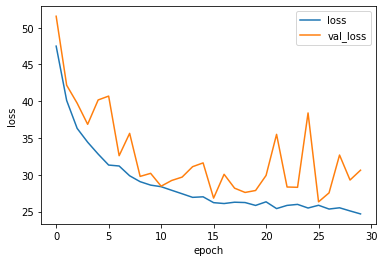

In [ ]:
plt.plot(histd1.history['loss'], label="loss")
plt.plot(histd1.history['val_loss'], label="val_loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

I'll try a better model:

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((9,)),
    tf.keras.layers.Dense(1024, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1)
])

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss=actual_loss, optimizer=opt)

In [ ]:
histd2 = model.fit(x, y, validation_split=0.2, epochs=30)

Epoch 1/30
511/511 [==============================] - 8s 15ms/step - loss: 50.0359 - val_loss: 54.9004
Epoch 2/30
511/511 [==============================] - 8s 16ms/step - loss: 44.0463 - val_loss: 50.1992
Epoch 3/30
511/511 [==============================] - 7s 14ms/step - loss: 42.3254 - val_loss: 54.8467
Epoch 4/30
511/511 [==============================] - 8s 15ms/step - loss: 40.4242 - val_loss: 55.6425
Epoch 5/30
511/511 [==============================] - 7s 14ms/step - loss: 38.7303 - val_loss: 58.0766
Epoch 6/30
511/511 [==============================] - 8s 15ms/step - loss: 38.6472 - val_loss: 55.7912
Epoch 7/30
511/511 [==============================] - 8s 15ms/step - loss: 37.4914 - val_loss: 59.7951
Epoch 8/30
511/511 [==============================] - 8s 15ms/step - loss: 36.6338 - val_loss: 68.2827
Epoch 9/30
511/511 [==============================] - 8s 16ms/step - loss: 36.2173 - val_loss: 49.2612
Epoch 10/30
511/511 [==============================] - 10s 19ms/step - lo

Obviously this was not the solution since the dropout is used when the model is overtrained. I'll try normalizing the variables, since the model must be giving more weight to larger variables.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_scaler = scaler.fit_transform(x)
y_scaler = scaler.fit_transform(y)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((9,)),
    tf.keras.layers.Dense(1024, activation="relu"),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1)
])

model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_148 (Dense)           (None, 1024)              10240     
                                                                 
 dense_149 (Dense)           (None, 512)               524800    
                                                                 
 dense_150 (Dense)           (None, 256)               131328    
                                                                 
 dense_151 (Dense)           (None, 128)               32896     
                                                                 
 dense_152 (Dense)           (None, 64)                8256      
                                                                 
 dense_153 (Dense)           (None, 32)                2080      
                                                                 
 dense_154 (Dense)           (None, 16)              

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss=actual_loss, optimizer=opt)

In [ ]:
histd3 = model.fit(x_scaler, y, validation_split=0.2, epochs=30)

Epoch 1/30
511/511 [==============================] - 8s 15ms/step - loss: 35.2451 - val_loss: 24.6832
Epoch 2/30
511/511 [==============================] - 7s 14ms/step - loss: 22.7905 - val_loss: 23.8299
Epoch 3/30
511/511 [==============================] - 7s 14ms/step - loss: 22.1285 - val_loss: 24.8009
Epoch 4/30
511/511 [==============================] - 7s 14ms/step - loss: 21.3554 - val_loss: 23.3855
Epoch 5/30
511/511 [==============================] - 7s 14ms/step - loss: 20.9325 - val_loss: 23.2629
Epoch 6/30
511/511 [==============================] - 7s 14ms/step - loss: 20.7097 - val_loss: 23.4876
Epoch 7/30
511/511 [==============================] - 7s 14ms/step - loss: 20.3903 - val_loss: 23.4049
Epoch 8/30
511/511 [==============================] - 7s 14ms/step - loss: 20.2122 - val_loss: 23.5860
Epoch 9/30
511/511 [==============================] - 7s 14ms/step - loss: 19.8892 - val_loss: 24.5518
Epoch 10/30
511/511 [==============================] - 7s 14ms/step - los

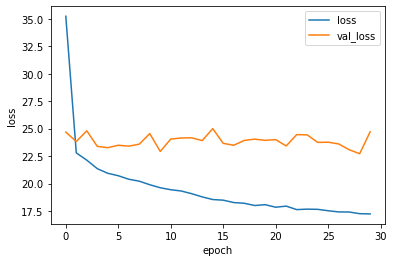

In [ ]:
plt.plot(histd3.history['loss'], label="loss")
plt.plot(histd3.history['val_loss'], label="val_loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

The normalization has worked. But there seems to be too much overshoot. We will now test with more epochs and then with Dropouts.

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((9,)),
    tf.keras.layers.Dense(1024, activation="relu"),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1)
])

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss=actual_loss, optimizer=opt)

In [ ]:
histd4 = model.fit(x_scaler, y, validation_split=0.2, epochs=60, batch_size=64)

Epoch 1/60
256/256 [==============================] - 5s 16ms/step - loss: 45.0495 - val_loss: 29.1628
Epoch 2/60
256/256 [==============================] - 4s 16ms/step - loss: 23.3391 - val_loss: 25.0043
Epoch 3/60
256/256 [==============================] - 4s 16ms/step - loss: 22.2824 - val_loss: 24.0018
Epoch 4/60
256/256 [==============================] - 4s 16ms/step - loss: 21.7383 - val_loss: 22.8904
Epoch 5/60
256/256 [==============================] - 4s 16ms/step - loss: 21.3841 - val_loss: 24.7722
Epoch 6/60
256/256 [==============================] - 4s 16ms/step - loss: 20.9356 - val_loss: 22.4208
Epoch 7/60
256/256 [==============================] - 4s 16ms/step - loss: 20.5535 - val_loss: 23.3636
Epoch 8/60
256/256 [==============================] - 4s 16ms/step - loss: 20.2656 - val_loss: 22.5787
Epoch 9/60
256/256 [==============================] - 4s 16ms/step - loss: 20.0076 - val_loss: 23.1312
Epoch 10/60
256/256 [==============================] - 4s 16ms/step - los

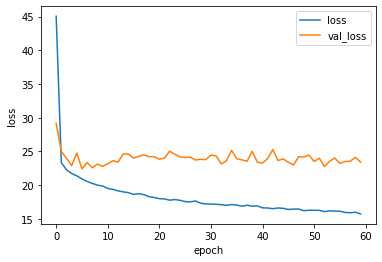

In [ ]:
plt.plot(histd4.history['loss'], label="loss")
plt.plot(histd4.history['val_loss'], label="val_loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

It's not the number of epochs that will fix our overfitting problems.

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((9,)),
    tf.keras.layers.Dense(1024, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1)
])

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss=actual_loss, optimizer=opt)

In [ ]:
histd5 = model.fit(x_scaler, y, validation_split=0.2, epochs=25)

Epoch 1/25
511/511 [==============================] - 11s 19ms/step - loss: 39.6083 - val_loss: 28.6238
Epoch 2/25
511/511 [==============================] - 12s 23ms/step - loss: 27.8700 - val_loss: 32.5135
Epoch 3/25
511/511 [==============================] - 10s 19ms/step - loss: 26.6200 - val_loss: 39.1665
Epoch 4/25
511/511 [==============================] - 8s 15ms/step - loss: 25.7579 - val_loss: 48.7851
Epoch 5/25
511/511 [==============================] - 8s 15ms/step - loss: 25.2374 - val_loss: 56.1682
Epoch 6/25
511/511 [==============================] - 8s 15ms/step - loss: 24.1875 - val_loss: 53.5889
Epoch 7/25
511/511 [==============================] - 8s 15ms/step - loss: 24.0078 - val_loss: 56.4320
Epoch 8/25
511/511 [==============================] - 8s 15ms/step - loss: 23.7969 - val_loss: 49.9629
Epoch 9/25
511/511 [==============================] - 8s 15ms/step - loss: 23.4009 - val_loss: 47.1542
Epoch 10/25
511/511 [==============================] - 7s 15ms/step - 

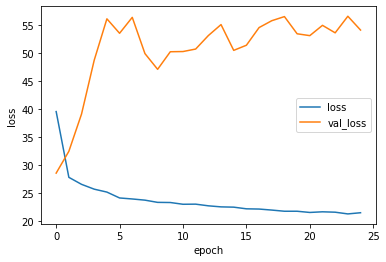

In [ ]:
plt.plot(histd5.history['loss'], label="loss")
plt.plot(histd5.history['val_loss'], label="val_loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

Hist4 has been our best result for the model that I would spend the most time on. I leave the work here for delivery, but I appreciate any advice to continue improving the model.

In [ ]:
model.save('my_NNA.h5')